In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

In [30]:
data = pd.read_csv('Downloads/deceptive-opinion.csv')
# Keeping only the neccessary columns
data = data[['text','polarity','deceptive']]
data['text'] = data['text'].map(lambda text: text if type(text)!=str else text.lower())

In [32]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.2)
# Removing neutral sentiments
train = train[train.polarity != "Neutral"]

Positive words


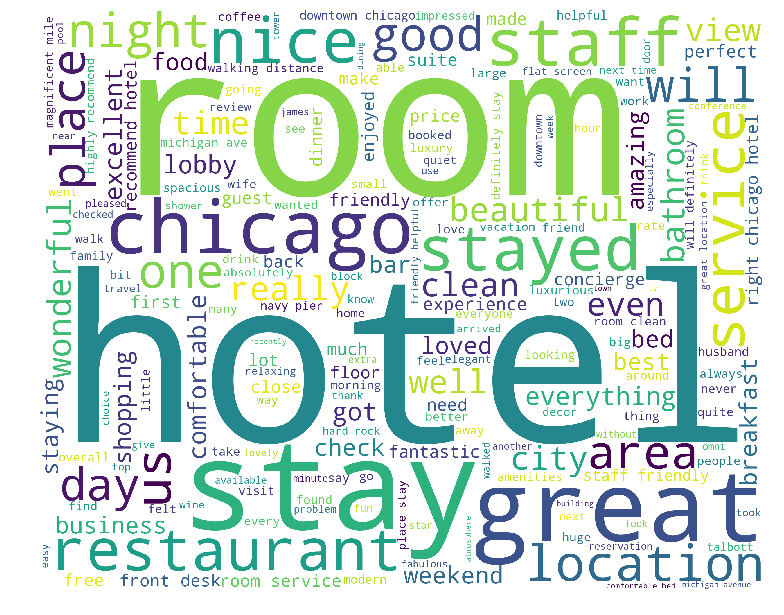

Negative words


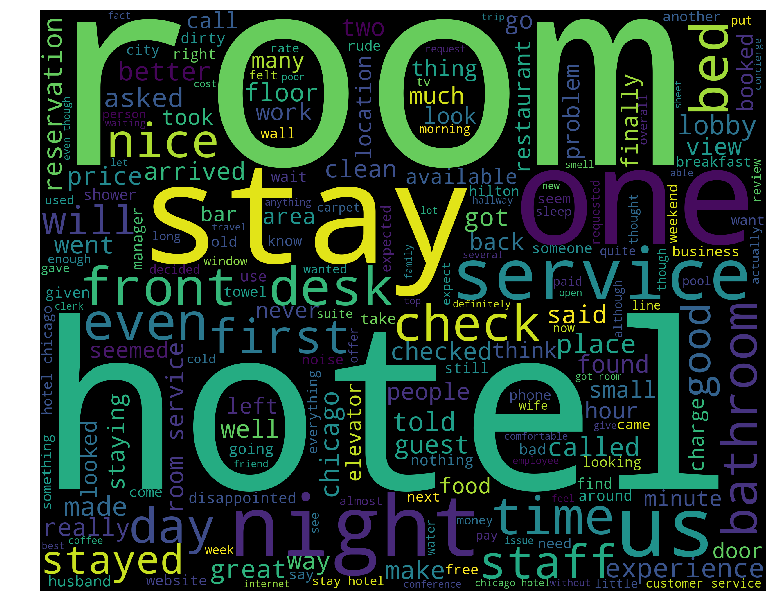

In [33]:
train_pos = train[ train['polarity'] == 'positive']
train_pos = train_pos['text']
train_neg = train[ train['polarity'] == 'negative']
train_neg = train_neg['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [34]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_cleaned,row.polarity))

test_pos = test[ test['polarity'] == 'positive']
test_pos = test_pos['text']
test_neg = test[ test['polarity'] == 'negative']
test_neg = test_neg['text']

In [35]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, polarity) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['containts(%s)' % word] = (word in document_words)
    return features

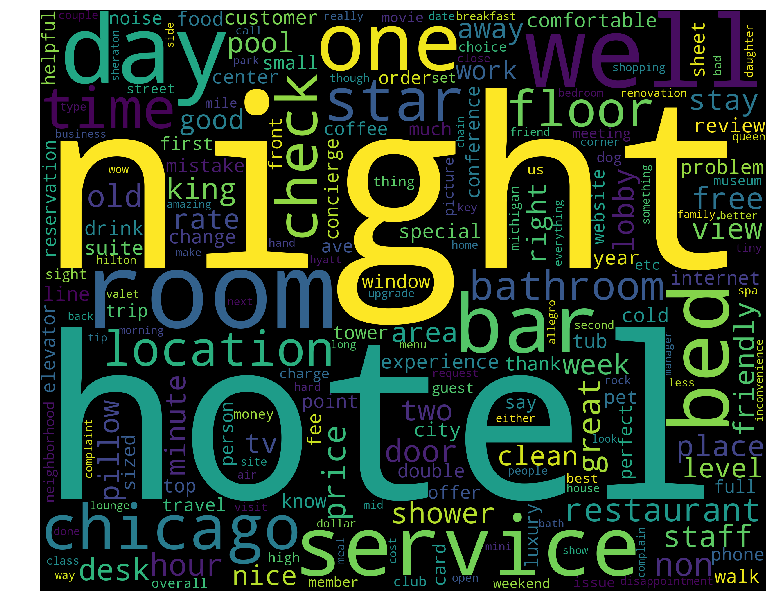

In [36]:
wordcloud_draw(w_features)

In [39]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [40]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))    

[Negative]: 145/119 
[Positive]: 175/169 


In [41]:
test_neg

1460    our stay at the sofitel was definitely below o...
1014    i'd been searching for a cool, non-chain hotel...
1560    i recently had a horrible stay at the intercon...
1019    i've used priceline for every trip i've made b...
1483    the hotel is located in an hard to fins locati...
826     my family of four went to a convention and sta...
1488    if you are looking for a true luxury experienc...
1524    i've never written a review before, but i just...
1266    my husband and i recently stayed at the fairmo...
1308    i was in business in chicago, so i decided to ...
857     do you imagine getting there for the first tim...
1381    the hard rock should stick to restaurants. aft...
1403    hi, i had very bad experience with this hotel,...
1309    i stayed at the swissotel chicago while i was ...
1367    i had high hopes for the ambassador east hotel...
1361    my daughter's broken heart my daughter loves a...
815     i booked this hotel with great expectations. i...
1124    as a f

In [42]:
test_pos

363    i had a great time here! it is centerally loca...
580    upon arrival at the ambassador east hotel in c...
237    we visited for my 40th birthday. we had never ...
421    the windy city fairmont hotel is one of chicag...
43     my husband and i decided to take a trip to chi...
422    the atmosphere at this hotel is truly remarkab...
458    i recently stayed at the hyatt regency in down...
592    how should i start? well, after staying at the...
74     from the moment i stepped up to the front entr...
588    the rates at the talbott hotel were cheaper th...
447    the hyatt regency chicago hotel was a delight ...
693    this hotel is great! i love its interior desig...
502    what a gorgeous hotel! from the moment we step...
600    my husband and i decided to plan a romantic ge...
747    i stayed here with my family when we were in c...
479    my husband and i recently visited the fairmont...
452    when my new fiance told me about his business ...
219    my wife and i stayed at 